In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [5]:
# Constants
agent_name = "swq14"
model_name = "gamma-on"

In [6]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

In [7]:
all_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)

### Evaluating the trained model

In [8]:
print("State  Features   Policy  Trained model")
for i in range(len(policy)):
    line = f"{i:2}{'':5}{all_features[i]}{'':2}{policy[i]}{'':7}["
    for Q_value in trained_model[i]:
        line += f"{Q_value:-7.3f}"
    line += "]"
    print(line)

State  Features   Policy  Trained model
 0     [0 0 0 0]  0       [  0.000  0.000  0.000  0.000]
 1     [0 0 0 1]  0       [  0.000  0.000  0.000  0.000]
 2     [0 0 1 1]  3       [  0.000  0.000  0.000  0.280]
 3     [0 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]  0       [  0.000  0.000  0.000  0.000]
 6     [0 0 1 2]  3       [ -0.004 -0.004  0.000  1.305]
 7     [0 1 1 2]  3       [ -0.004  0.000  0.000  1.713]
 8     [1 1 1 2]  3       [  0.000  0.000  0.000  1.963]
 9     [0 0 2 2]  3       [ -0.004 -0.004  0.000  0.638]
10     [0 1 2 2]  2       [ -0.004  0.000  1.281  0.000]
11     [1 1 2 2]  3       [  0.000  0.000  0.000  1.710]
12     [0 2 2 2]  2       [ -0.004  0.000  0.029  0.000]
13     [1 2 2 2]  3       [  0.000  0.000  0.000  1.075]
14     [2 2 2 2]  3       [  0.000  0.000  0.000  0.007]


### Looking at the training process

In [9]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [10]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Training performance over rounds

In [11]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [12]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']

round_list      = list(training_results['by_round'])
rounds          = np.zeros(number_of_rounds)
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']
    rounds[i]          = round['round']

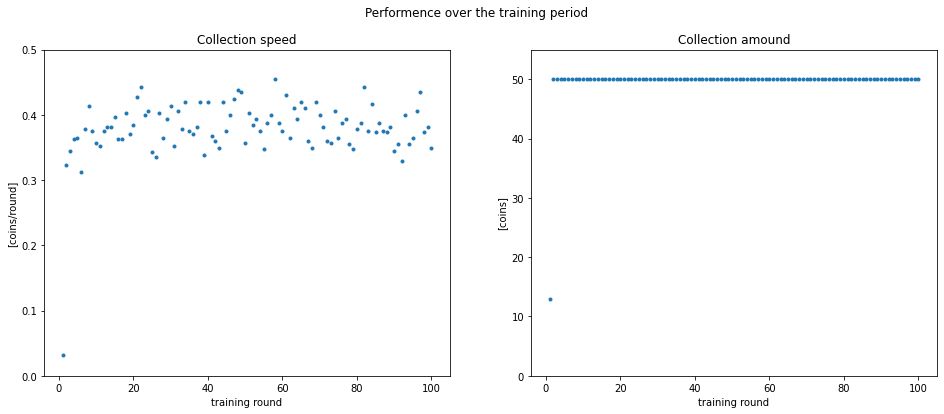

In [13]:
plt.figure(figsize = (16,6))
plt.suptitle("Performence over the training period")
plt.subplot(1, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, '.')
plt.ylim((0, 1.1*max(speed)))
plt.title("Collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(1, 2, 2)
plt.plot(rounds, collected_coins, '.')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.show()

### Evolution of the Q-model

In [14]:
allQs = np.load("Qtrain.npy")

for i in range(len(policy)):
    analyze_state(i)

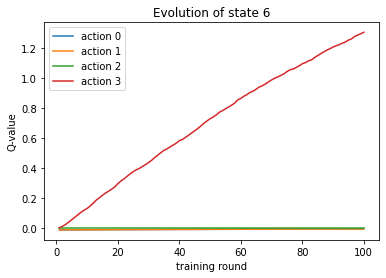

In [20]:
analyze_state(6)

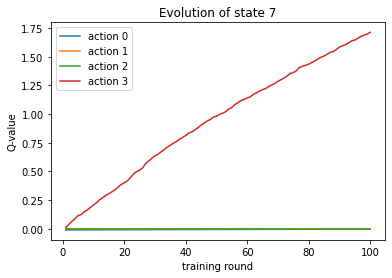

In [15]:
analyze_state(7)

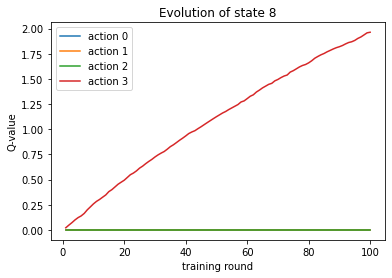

In [16]:
analyze_state(8)

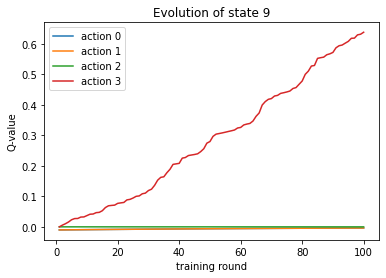

In [17]:
analyze_state(9)

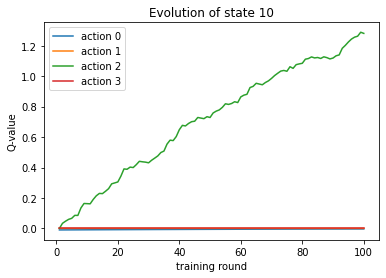

In [18]:
analyze_state(10)

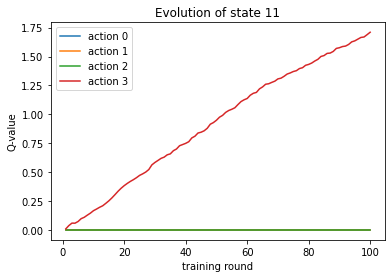

In [19]:
analyze_state(11)